In [70]:
import pandas as pd
import numpy as np
# import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt

In [71]:
dataframe = pd.read_csv("zomato data .csv")
print(dataframe)

                      name online_order book_table   rate  votes  \
0                    Jalsa          Yes        Yes  4.1/5    775   
1           Spice Elephant          Yes         No  4.1/5    787   
2          San Churro Cafe          Yes         No  3.8/5    918   
3    Addhuri Udupi Bhojana           No         No  3.7/5     88   
4            Grand Village           No         No  3.8/5    166   
..                     ...          ...        ...    ...    ...   
143       Melting Melodies           No         No  3.3/5      0   
144        New Indraprasta           No         No  3.3/5      0   
145           Anna Kuteera          Yes         No  4.0/5    771   
146                 Darbar           No         No  3.0/5     98   
147          Vijayalakshmi          Yes         No  3.9/5     47   

     approx_cost(for two people) listed_in(type)  
0                            800          Buffet  
1                            800          Buffet  
2                            8

In [72]:
def handleRate(value):
    value=str(value).split('/')
    value=value[0];
    return float(value)

dataframe['rate']=dataframe['rate'].apply(handleRate)
print(dataframe.head())
                             

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [73]:
dataframe.info


<bound method DataFrame.info of                       name online_order book_table  rate  votes  \
0                    Jalsa          Yes        Yes   4.1    775   
1           Spice Elephant          Yes         No   4.1    787   
2          San Churro Cafe          Yes         No   3.8    918   
3    Addhuri Udupi Bhojana           No         No   3.7     88   
4            Grand Village           No         No   3.8    166   
..                     ...          ...        ...   ...    ...   
143       Melting Melodies           No         No   3.3      0   
144        New Indraprasta           No         No   3.3      0   
145           Anna Kuteera          Yes         No   4.0    771   
146                 Darbar           No         No   3.0     98   
147          Vijayalakshmi          Yes         No   3.9     47   

     approx_cost(for two people) listed_in(type)  
0                            800          Buffet  
1                            800          Buffet  
2         

In [74]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


Text(0.5, 0, 'type of restaurant')

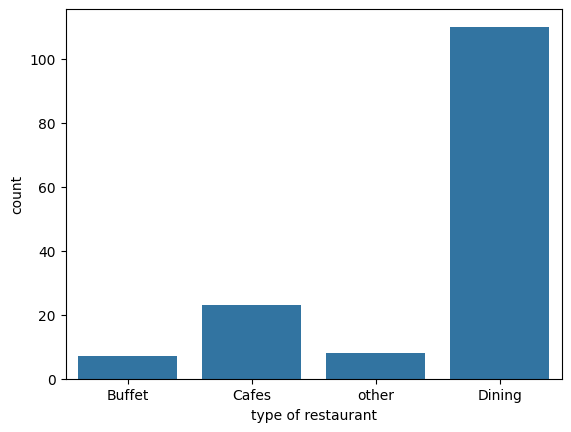

In [75]:
sns.countplot(x=dataframe['listed_in(type)'])
plt.xlabel("type of restaurant") 

MAJORITY OF CUSTOMERS FALLS IN DINNING CATEGORY

In [76]:
dataframe.head()


,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


Text(0, 0.5, 'votes')

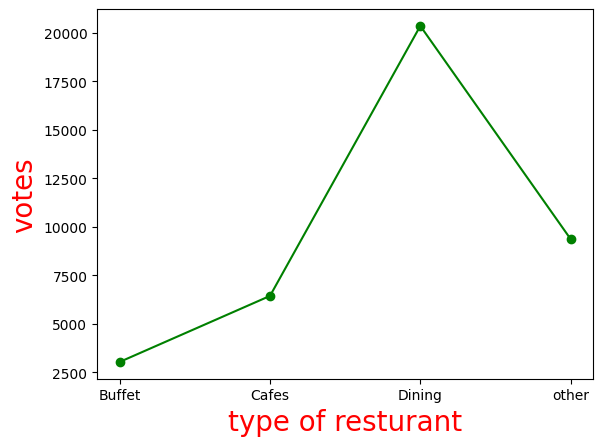

In [77]:
grouped_data = dataframe.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})
plt.plot(result, c="green",marker="o")
plt.xlabel("type of resturant", c="red", size=20)
plt.ylabel("votes",c="red",size=20)

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

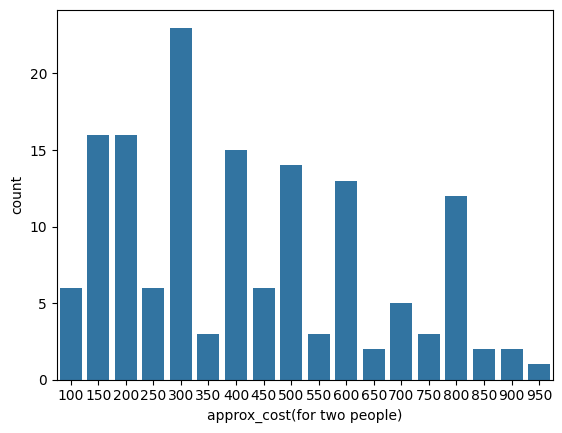

In [78]:
couple_data=dataframe['approx_cost(for two people)']
sns.countplot(x=couple_data)

In [82]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


<Axes: xlabel='online_order', ylabel='rate'>

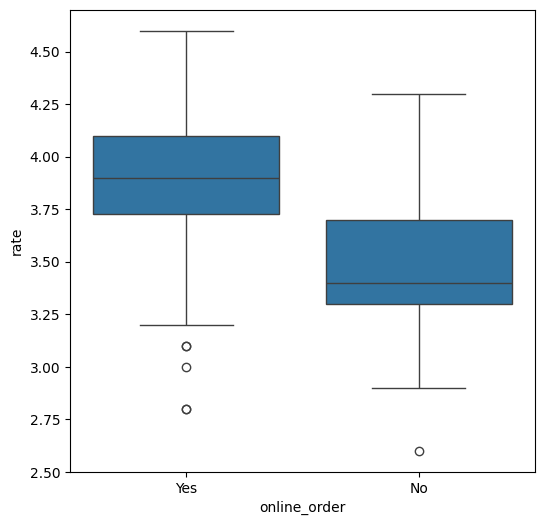

In [83]:
plt.figure(figsize = (6,6))
sns.boxplot(x = 'online_order', y = 'rate' , data = dataframe)

In [84]:
dataframe.head()


,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


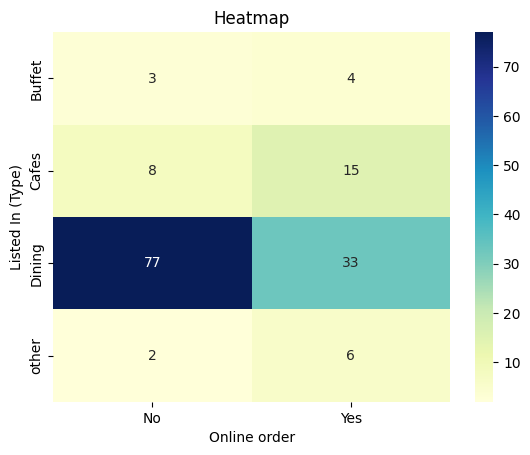

In [92]:
pivot_table = dataframe.pivot_table(index = 'listed_in(type)' , columns='online_order' , aggfunc= 'size' ,fill_value=0)
sns.heatmap(pivot_table ,annot = True,cmap = "YlGnBu",fmt= 'd')
plt.title("Heatmap")
plt.xlabel("Online order")
plt.ylabel("Listed In (Type)")
plt.show()
